# Serial correlation of permutations - Mersenne Twister

Permutations should show no serial correlation. I measure serial correlation by the number of fixed points between the first list and the permutation of it. The distribution of the number of fixed points has a Poisson distribution when the length of the list is "long enough".

We generated $2 \times 10^5$ permutations of the numbers $(1, 2, \dots, 2100)$ and computed the distribution of the number of fixed points, then tested whether the observed distribution matched the theoretical one. We repeated this for 1000 different starting seeds.

## Probability distribution of the number of matches
Let $S_n$ denote the number of matches between the previous permutation and the current permutation.
Let $D_n$ denote the number of derangements (permutations where no element is fixed) of $n$ items.
$D_n$ satisfies the recurrence relation $D_n = (n-1)\left( D_{n-1} + D_{n-2}\right)$ with initial values $D_1 = 0, D_2 = 1$.

\begin{align*}
P(S_n=0) &= \frac{D_n}{n!} \\ 
P(S_n=1) &= \frac{n D_{n-1}}{n!} \\
\vdots \\
P(S_n = k) &= \frac{{n \choose k} D_{n-k}}{n!} 
\end{align*}

## Poisson approximation

The number of matches $S_n$ is a sum of indicator variables, one for each position in the list. $X_i = 1$ if position $i$ is the same in the two permutations and $0$ otherwise. The probability that position $i$ is fixed is $\frac{1}{n}$, for each $i$.

It turns out that the sum of correlated Bernoulli random variables is asymptotically Poisson distributed, with parameter equal to the sum of all of the Bernoulli parameters. Therefore, $S_n$ is asymptotically Poisson distributed with parameter $1$.

## Chi-squared test

To get a $p$-value for whether the observed distribution matched the Poisson(1), we used a chi-squared test. We used 12 categories: one for 0 through 10 matches and one for 11+.

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import chisquare, kstest, ks_2samp, anderson_ksamp
from serial_test import test_poisson, exact_chisq_distr, exact_chisq_pvalue

# Sensitivity of the chi-squared test to the maximum bin

In [2]:
reps = 2*10**5
cell_counts = np.loadtxt("mt_fp_distr_2100.csv", delimiter=",")

expected_counts = np.array(np.exp(-1)*np.array([1./math.factorial(k) for k in range(11)]) * reps)
expected_counts = np.append(expected_counts, reps - sum(expected_counts))
expected_distr = [[i]*expected_counts[i] for i in range(len(expected_counts))]
expected_distr = sum(expected_distr, [])

ks_pvalue = [1]*1000
pvalues_nmax11 = [1]*1000
exact_chisq_11 = exact_chisq_distr(reps, nmax=11)
pvalues_nmax10 = [1]*1000
exact_chisq_10 = exact_chisq_distr(reps, nmax=10)
pvalues_nmax9 = [1]*1000
exact_chisq_9 = exact_chisq_distr(reps, nmax=9)
pvalues_nmax8 = [1]*1000
exact_chisq_8 = exact_chisq_distr(reps, nmax=8)
pvalues_nmax7 = [1]*1000
exact_chisq_7 = exact_chisq_distr(reps, nmax=7)
ad_pvalue = [1]*1000

for j in range(1000):
    distr = [[i]*cell_counts[j][i] for i in range(len(cell_counts[j]))]
    distr = sum(distr, [])
    pvalues_nmax11[j] = test_poisson(distr, exact_chisq_11, nmax=11)
    pvalues_nmax10[j] = test_poisson(distr, exact_chisq_10, nmax=10)
    pvalues_nmax9[j] = test_poisson(distr, exact_chisq_9, nmax=9)
    pvalues_nmax8[j] = test_poisson(distr, exact_chisq_8, nmax=8)
    pvalues_nmax7[j] = test_poisson(distr, exact_chisq_7, nmax=7)
    ks_pvalue[j] = ks_2samp(distr, expected_distr)[1]
    ad_pvalue[j] = anderson_ksamp([distr, expected_distr])[2]

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/stats/morestats.py:1684: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


KstestResult(statistic=0.024600000000000011, pvalue=0.58044703661226749)

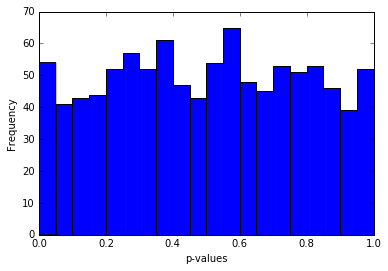

In [3]:
plt.hist(pvalues_nmax11, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax11, 'uniform')

KstestResult(statistic=0.027900000000000036, pvalue=0.41387205992652021)

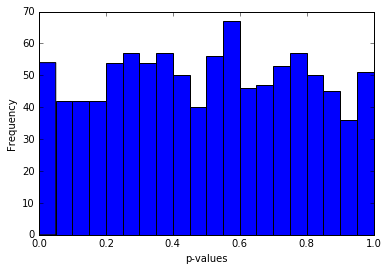

In [4]:
plt.hist(pvalues_nmax10, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax10, 'uniform')

KstestResult(statistic=0.028200000000000003, pvalue=0.40009118089356677)

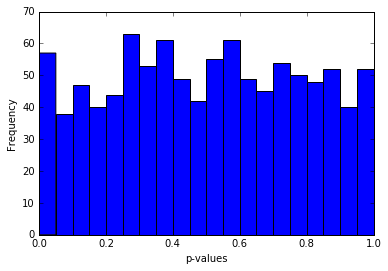

In [5]:
plt.hist(pvalues_nmax9, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax9, 'uniform')

KstestResult(statistic=0.030899999999999983, pvalue=0.29023703987941629)

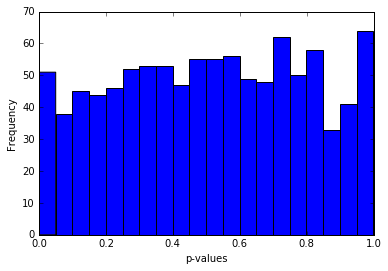

In [6]:
plt.hist(pvalues_nmax8, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax8, 'uniform')

KstestResult(statistic=0.025800000000000045, pvalue=0.51855487675430123)

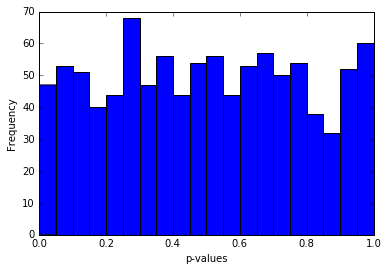

In [7]:
plt.hist(pvalues_nmax7, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax7, 'uniform')

# Approximate KS Tests (in place of chi-squared)

KstestResult(statistic=0.74814813792105372, pvalue=0.0)

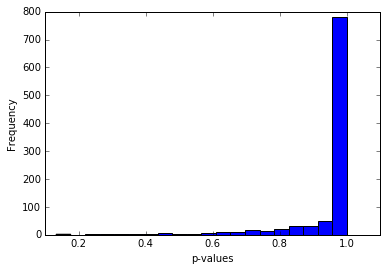

In [8]:
plt.hist(ks_pvalue, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(ks_pvalue, 'uniform')

# Approximate Anderson Darling Tests (in place of chi-squared)

KstestResult(statistic=0.44031427251157718, pvalue=0.0)

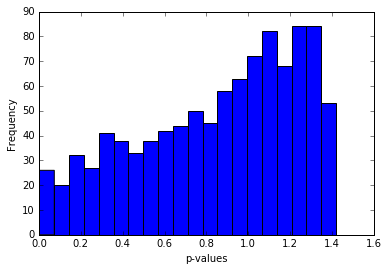

In [9]:
plt.hist(ad_pvalue, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(ad_pvalue, 'uniform')

# Evidence that the Poisson approximation works


We use the above formulas to actually compute the probabilities for $n = 3, 4, ... 150$. Once we get to $n=171$, there's a numerical overflow and we can't calculate things this way. However it seems fine: the approximation error goes to zero quickly.

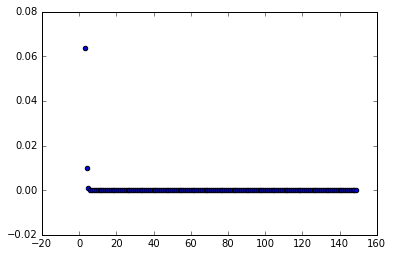

In [10]:
def count_derangements(n):
    """
    Count the number of derangements of k items, for k=0, 1, ..., n
    """
    derangements = np.ones(n+1)
    derangements[1] = 0
    for i in range(3, n+1):
        derangements[i] = (i-1)*(derangements[i-1] + derangements[i-2])
    return derangements


def fixed_perm_probabilities(n, k):
    """
    Derive the frequency of permutations of n items that fix exactly i items,
    for i = 0, 1, ..., k
    """
    perm_count = np.zeros(k+1)
    derangements = count_derangements(n)
    for i in range(k+1):
        perm_count[i] = derangements[n-i]/(math.factorial(i)*math.factorial(n-i))
    return perm_count

nmax = 10
approx = np.exp(-1)*np.array([1./math.factorial(k) for k in range(nmax)])
err = np.zeros(150)
for n in range(3, 150):
    if nmax > n:
        exact = fixed_perm_probabilities(n, n)
        xx = len(exact)
        err[n] = np.sum( (approx[:xx]-exact)**2 )
    else:
        exact = fixed_perm_probabilities(n, nmax)
        err[n] = np.sum( (approx-exact[:nmax])**2 )        
plt.scatter(range(3, 150), err[3:])

# Bounding the error in the $p$-value

Using L1 bounds,

$$\big\lvert \int \psi dF - \int \psi dG \big\rvert \leq \lVert F-G \rVert_1 \lVert\psi\rVert_\infty$$

In [11]:
nmax = 10
approx = np.exp(-1)*np.array([1./math.factorial(k) for k in range(nmax)])
err = np.zeros(150)
for n in range(3, 150):
    if nmax > n:
        exact = fixed_perm_probabilities(n, n)
        xx = len(exact)
        err[n] = 2*np.sum( abs(approx[:xx]-exact) )
    else:
        exact = fixed_perm_probabilities(n, nmax)
        err[n] = 2*np.sum( abs(approx-exact[:nmax]) )        
err

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         9.11919627e-01,   3.90757086e-01,   1.36444924e-01,
         4.03109669e-02,   1.03367000e-02,   2.34346474e-03,
         4.76377197e-04,   8.74455543e-05,   1.45666310e-05,
         2.20575555e-06,   3.03951825e-07,   3.81746332e-08,
         4.38030361e-09,   4.60637844e-10,   4.45585782e-11,
         3.98035597e-12,   3.29760318e-13,   2.56165832e-14,
         2.22711050e-15,   5.14887612e-16,   3.54640413e-16,
         1.99061213e-16,   1.74360885e-16,   2.23997439e-16,
         1.67645184e-16,   1.82176882e-16,   1.15580187e-16,
         5.64064651e-17,   1.47760662e-17,   4.36772539e-18,
         1.47760662e-17,   1.29240711e-16,   2.39419368e-16,
         2.82140322e-16,   2.78671299e-16,   2.77775985e-16,
         1.67400815e-16,   5.63789365e-17,   8.94890309e-19,
         1.11893476e-16,   3.47812480e-16,   4.20047450e-16,
         3.67765189e-16,   4.38045206e-16,   4.27613148e-16,
         3.69957310e-16,

# Seed vs p-value

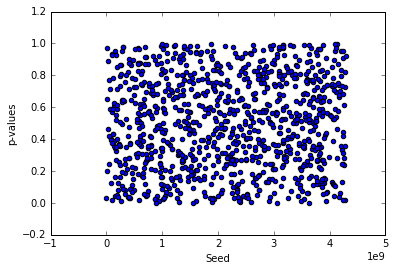

In [13]:
np.random.seed(347728688) # From random.org Timestamp: 2017-01-19 18:22:16 UTC
seed_values = np.random.randint(low = 1, high = 2**32, size = 1000)
plt.scatter(seed_values, pvalues_nmax11)
plt.ylabel("p-values")
plt.xlabel("Seed")
plt.show()

In [15]:
bad_seeds = seed_values[np.array(pvalues_nmax11) <= 0.01]
bad_seeds

array([1599318147, 1885135278, 3050468104, 2587629138, 2400369455,
       1295016908,  893095851, 3486154815, 3633739802, 1547915294])

In [16]:
reps = 2*10**5

cell_counts = np.loadtxt("mt_fp_distr_2100.csv", delimiter=",")
expected_counts = np.array(np.exp(-1)*np.array([1./math.factorial(k) for k in range(11)]) * reps)
expected_counts = np.append(expected_counts, reps - sum(expected_counts))

count_mismatch = []
for j in range(1000):
    count_mismatch.append(cell_counts[j] - expected_counts)
    
np.array(cell_counts[np.array(pvalues_nmax11) <= 0.01], dtype=int)

array([[73830, 73214, 36836, 12307,  3100,   619,    82,    11,     0,
            0,     1,     0],
       [73782, 73571, 36393, 12266,  3227,   632,   105,    20,     3,
            0,     1,     0],
       [73155, 74018, 36727, 12286,  3103,   609,    90,    10,     0,
            0,     2,     0],
       [73421, 73858, 36499, 12504,  2959,   640,    94,    20,     4,
            0,     1,     0],
       [73910, 73135, 36740, 12401,  3119,   585,   100,     7,     1,
            1,     1,     0],
       [73309, 73398, 37058, 12436,  3058,   634,    89,    14,     2,
            1,     1,     0],
       [73684, 73376, 36871, 12189,  3154,   603,   102,    17,     3,
            0,     0,     1],
       [73292, 73737, 36826, 12343,  3027,   638,   115,    21,     0,
            0,     1,     0],
       [73070, 73995, 36889, 12215,  3121,   593,    94,    20,     2,
            0,     0,     1],
       [73603, 73426, 36975, 12189,  3076,   619,    98,    12,     0,
            1,     0

In [17]:
num_matches = np.array(list(range(12))*1000)
count_mismatch = np.concatenate(count_mismatch).ravel()
len(num_matches)

12000

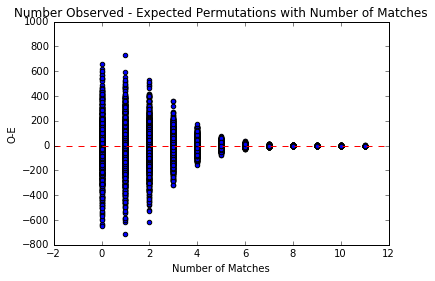

In [18]:
plt.scatter(num_matches, count_mismatch)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Number Observed - Expected Permutations with Number of Matches")
plt.xlabel("Number of Matches")
plt.ylabel("O-E")
plt.show()

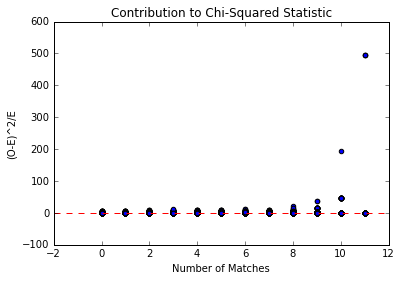

In [19]:
chisq_stat = [(cell_counts[j] - expected_counts)**2 / expected_counts for j in range(1000)]
chisq_stat = np.concatenate(chisq_stat).ravel()

plt.scatter(num_matches, chisq_stat)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Contribution to Chi-Squared Statistic")
plt.xlabel("Number of Matches")
plt.ylabel("(O-E)^2/E")
plt.show()

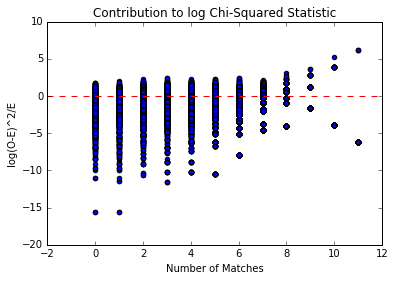

In [20]:
plt.scatter(num_matches, np.log(chisq_stat))
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Contribution to log Chi-Squared Statistic")
plt.xlabel("Number of Matches")
plt.ylabel("log(O-E)^2/E")
plt.show()

# Compare against SHA-256 Distribution

In [31]:
bincounts_sha = np.loadtxt("sha_fp_distr_2100.csv", delimiter=",")
sha_probs = [0]*12
for j in range(12):
    tmp = [bincounts_sha[i][j] for i in range(len(bincounts_sha))]
    sha_probs[j] = np.mean(tmp)/reps
expected_distr_sha = np.array(sha_probs)*reps

sim = np.random.multinomial(n=reps, pvals=sha_probs, size=10000)
expected_sha_counts = reps*np.array(sha_probs)
sha_chisq_distr = list(map(lambda x: chisquare(x, expected_sha_counts)[0], sim))

def test_against_sha(bincounts_mt, expected_distr, exact_chisq):
    bincounts_mt_new = np.ones(nmax+1)
    bincounts_mt_new[:nmax] = bincounts_mt[:nmax]
    bincounts_mt_new[nmax] = sum(bincounts_mt[nmax:])
    bincounts_sha = np.ones(nmax+1)
    bincounts_sha[:nmax] = expected_distr[:nmax]
    bincounts_sha[nmax] = sum(expected_distr[nmax:])
    return exact_chisq_pvalue(bincounts_mt_new, bincounts_sha, exact_chisq)
    
    
pvalues_nmax11 = [1]*1000
pvalues_nmax10 = [1]*1000
pvalues_nmax9 = [1]*1000
pvalues_nmax8 = [1]*1000
pvalues_nmax7 = [1]*1000

for j in range(1000):
    pvalues_nmax11[j] = test_against_sha(cell_counts[j], expected_distr_sha, sha_chisq_distr)
#    pvalues_nmax10[j] = test_against_sha(cell_counts[j], expected_distr_sha, exact_chisq_10)
#    pvalues_nmax9[j] = test_against_sha(cell_counts[j], expected_distr_sha, exact_chisq_9)
#    pvalues_nmax8[j] = test_against_sha(cell_counts[j], expected_distr_sha, exact_chisq_8)
#    pvalues_nmax7[j] = test_against_sha(cell_counts[j], expected_distr_sha, exact_chisq_7)

KstestResult(statistic=0.032200000000000006, pvalue=0.24609912594806072)

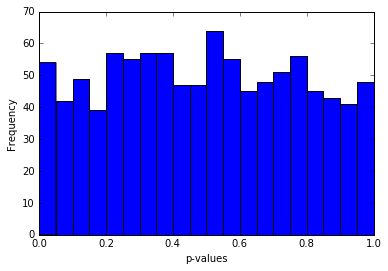

In [32]:
plt.hist(pvalues_nmax11, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax11, 'uniform')

In [ ]:
plt.hist(pvalues_nmax10, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax10, 'uniform')

In [ ]:
plt.hist(pvalues_nmax9, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax9, 'uniform')

In [ ]:
plt.hist(pvalues_nmax7, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax7, 'uniform')

In [ ]:
nmax = 8

def modify_cell_counts(bincounts, nmax):
    bincounts_new = np.ones(nmax+1)
    bincounts_new[:nmax] = bincounts[:nmax]
    bincounts_new[nmax] = sum(bincounts[nmax:])
    return bincounts_new

expected_distr_new = modify_cell_counts(expected_distr, nmax=nmax)
chisq_stat = [(modify_cell_counts(cell_counts[j], nmax=nmax) - expected_distr_new)**2 / expected_distr_new for j in range(1000)]
chisq_stat = np.concatenate(chisq_stat).ravel()
num_matches = np.array(list(range(nmax+1))*1000)


plt.scatter(num_matches, chisq_stat)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Contribution to Chi-Squared Statistic")
plt.xlabel("Number of Matches")
plt.ylabel("(O-E)^2/E")
plt.show()